In [31]:
from Solver.AdamSolver import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

In [32]:
param_grid = {'lr': [0.1, 0.01, 0.001], 'beta1': [0, 0.9],'beta2': [0.99, 0.999]}
n_learning_rates = len(param_grid['lr'])
param_list = list(ParameterGrid(param_grid))

In [33]:
dL = lambda y: 2 * (y - 4)


Adam Configuration: {'beta1': 0, 'beta2': 0.99, 'lr': 0.1}
Epoch: 50, Error: 0.002713592662321851.
Epoch: 100, Error: 3.325902442341544e-07.
Last epoch: 121, Error: 1.990356768288848e-09.

Adam Configuration: {'beta1': 0, 'beta2': 0.999, 'lr': 0.1}
Epoch: 50, Error: 0.0030077748038097596.
Epoch: 100, Error: 1.4176203055882297e-06.
Last epoch: 121, Error: 2.8181462496945642e-08.

Adam Configuration: {'beta1': 0.9, 'beta2': 0.99, 'lr': 0.1}
Epoch: 50, Error: 0.018160568032952185.
Epoch: 100, Error: 0.0018302403342262963.
Last epoch: 121, Error: 0.000714727173591001.

Adam Configuration: {'beta1': 0.9, 'beta2': 0.999, 'lr': 0.1}
Epoch: 50, Error: 0.01679485677833714.
Epoch: 100, Error: 0.001323342903932101.
Last epoch: 121, Error: 0.0002916707837297139.

Adam Configuration: {'beta1': 0, 'beta2': 0.99, 'lr': 0.01}
Epoch: 50, Error: 0.008793133460689884.
Epoch: 100, Error: 0.0075643705234522685.
Epoch: 150, Error: 0.006293153037989274.
Epoch: 200, Error: 0.004953319171288939.
Epoch: 250, E

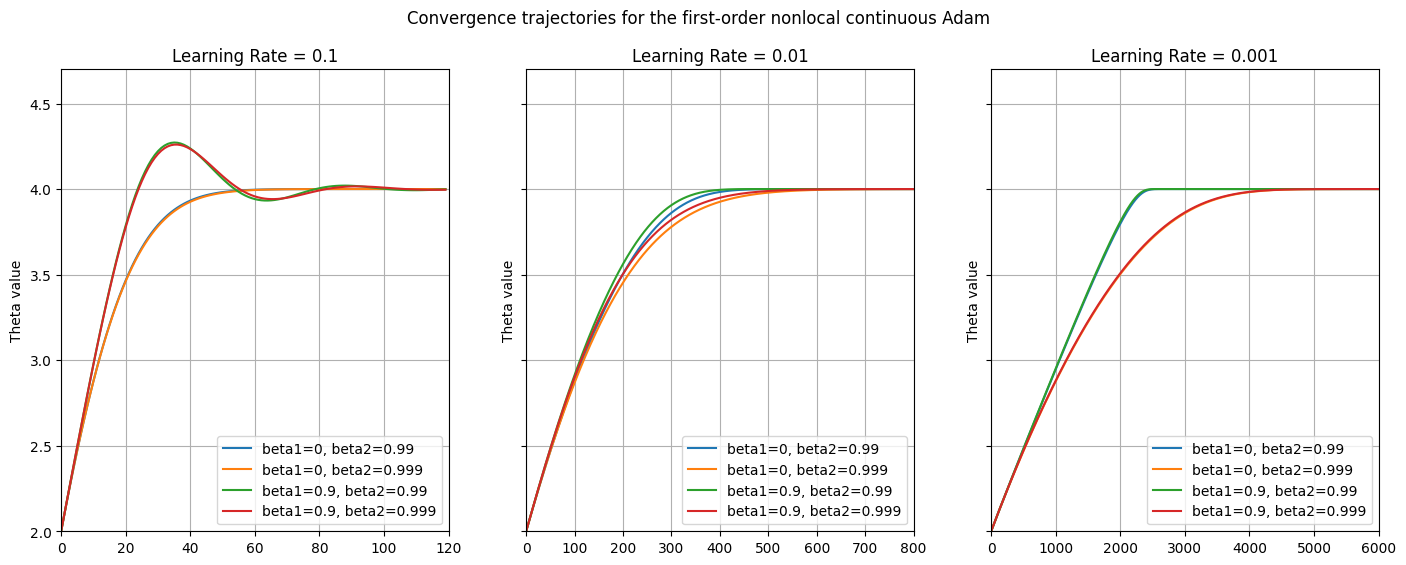

In [34]:
fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(17, 6), sharex=False, sharey=True)   
fig.suptitle('Convergence trajectories for the first-order nonlocal continuous Adam')
epochs = int(12e1)

for i, lr in enumerate(param_grid['lr']):

    ax = axs[i] if n_learning_rates > 1 else axs
    filtered_params = [p for p in param_list if p['lr'] == lr]

    if lr == 0.1:
        epochs = 120
    elif lr == 0.01:
        epochs = 800
    else:
        epochs = 6000

    for params in filtered_params:
        theta_initial= 2.0
        
        print(f'\nAdam Configuration: {params}')
        solver = Adam(dL=dL, lr=lr, beta1=params['beta1'], beta2=params['beta2'], epochs=epochs)
        solver.solve(theta_initial=theta_initial)

        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        ax.set_title(f'Learning Rate = {lr}')
        ax.plot(solver.theta_result, label=label)
        ax.set_xlim([0, epochs])
        ax.set_ylim([2.0, 4.7])
        ax.grid(True)
        ax.set_ylabel('Theta value')
        ax.legend(loc = 'lower right')